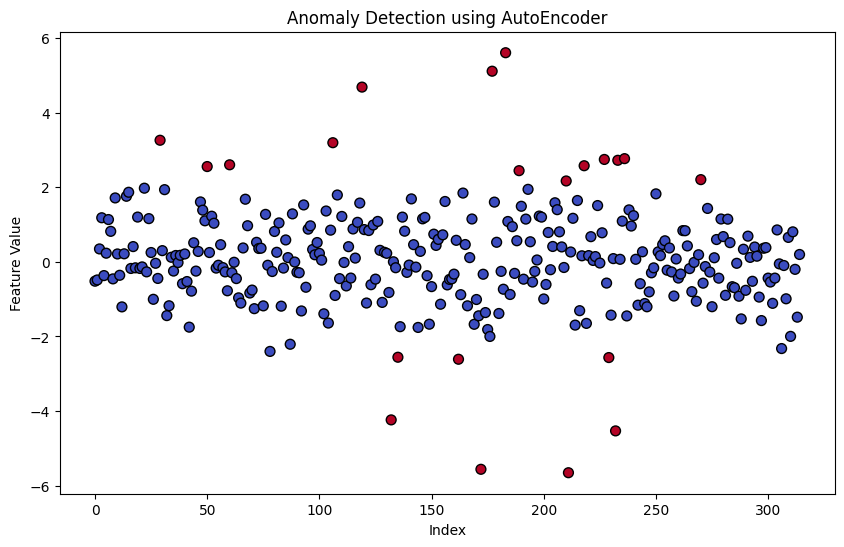

In [3]:
# Install pyOD library
!pip install pyod

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.auto_encoder import AutoEncoder  # Autoencoder for anomaly detection
from sklearn.model_selection import train_test_split

# Generate univariate data
X_univariate = np.random.normal(loc=0, scale=1, size=1000).reshape(-1, 1)
X_univariate_anomalies = np.random.uniform(low=-6, high=6, size=(50, 1))
X_univariate = np.concatenate([X_univariate, X_univariate_anomalies], axis=0)

# Split into train and test
X_train_u, X_test_u = train_test_split(X_univariate, test_size=0.3, random_state=42)

# Initialize the Autoencoder model
clf_autoencoder = AutoEncoder(contamination=0.05, verbose=0)
clf_autoencoder.fit(X_train_u)

# Predict anomalies
y_test_pred_u = clf_autoencoder.predict(X_test_u)  # 0 for inliers, 1 for outliers

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(X_test_u)), X_test_u, c=y_test_pred_u, cmap='coolwarm', s=50, edgecolor='k')
plt.title("Anomaly Detection using AutoEncoder")
plt.xlabel("Index")
plt.ylabel("Feature Value")
plt.show()
